In [ ]:
# Task 2 : Creadit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
CCF=pd.read_csv(r'C:\Machine Learning Intership\Task2\fraudTest.csv')

In [3]:
CCF.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
CCF.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
CCF.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [6]:
CCF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [7]:
CCF.shape

(555719, 23)

In [8]:
CCF.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [9]:
CCF['category'].unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [10]:
encoder=LabelEncoder()
CCF['merchant']=encoder.fit_transform(CCF['merchant'])
CCF['category']=encoder.fit_transform(CCF['category'])
CCF['street']=encoder.fit_transform(CCF['street'])
CCF['job']=encoder.fit_transform(CCF['job'])
CCF['trans_num']=encoder.fit_transform(CCF['trans_num'])
CCF['first']=encoder.fit_transform(CCF['first'])
CCF['city']=encoder.fit_transform(CCF['city'])
CCF['last']=encoder.fit_transform(CCF['last'])
CCF['gender']=encoder.fit_transform(CCF['gender'])
CCF['state']=encoder.fit_transform(CCF['state'])
CCF['dob']=encoder.fit_transform(CCF['dob'])
CCF['trans_date_trans_time']=encoder.fit_transform(CCF['trans_date_trans_time'])

In [11]:
CCF.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2291163933867244,319,10,2.86,151,115,1,341,...,33.9659,-80.9355,333497,275,376,98699,1371816865,33.986391,-81.200714,0
1,1,1,3573030041201292,591,10,29.84,163,457,0,354,...,40.3207,-110.4360,302,392,760,108785,1371816873,39.450498,-109.960431,0
2,2,2,3598215285024754,611,5,41.28,24,249,0,865,...,40.6729,-73.5365,34496,259,421,433979,1371816893,40.495810,-74.196111,0
3,3,3,3591919803438423,222,9,60.05,42,457,1,320,...,28.5697,-80.8191,54767,407,718,71993,1371816915,28.812398,-80.883061,0
4,4,4,3526826139003047,292,13,3.19,247,261,1,548,...,44.2529,-85.0170,1126,196,177,190585,1371816917,44.959148,-85.884734,0


In [13]:
CCF.duplicated().any()

False

In [14]:
data=CCF.head(n=15000)
CCF['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [15]:
CCF.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2291163933867244,319,10,2.86,151,115,1,341,...,33.9659,-80.9355,333497,275,376,98699,1371816865,33.986391,-81.200714,0
1,1,1,3573030041201292,591,10,29.84,163,457,0,354,...,40.3207,-110.4360,302,392,760,108785,1371816873,39.450498,-109.960431,0
2,2,2,3598215285024754,611,5,41.28,24,249,0,865,...,40.6729,-73.5365,34496,259,421,433979,1371816893,40.495810,-74.196111,0
3,3,3,3591919803438423,222,9,60.05,42,457,1,320,...,28.5697,-80.8191,54767,407,718,71993,1371816915,28.812398,-80.883061,0
4,4,4,3526826139003047,292,13,3.19,247,261,1,548,...,44.2529,-85.0170,1126,196,177,190585,1371816917,44.959148,-85.884734,0


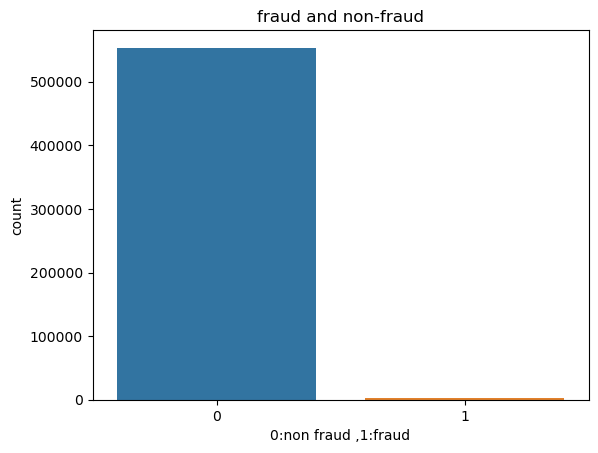

In [16]:
sns.countplot(x='is_fraud',data=CCF)
plt.title('fraud and non-fraud')
plt.xlabel('0:non fraud ,1:fraud')
plt.ylabel('count')
plt.show()

In [17]:
X=CCF.drop('is_fraud',axis=1)
y=CCF['is_fraud']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:",classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

confusion_matrix:
 [[110718      0]
 [   426      0]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

Accuracy: 0.9961671345281796


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report: \n",classification_report(y_test,y_pred))
print("Accuracy Score:",dtree.score(X_test, y_test))

confusion_matrix:
 [[110537    181]
 [   148    278]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.61      0.65      0.63       426

    accuracy                           1.00    111144
   macro avg       0.80      0.83      0.81    111144
weighted avg       1.00      1.00      1.00    111144

Accuracy Score: 0.9970398761966458


In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)
y_pred=rfc_model.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))
print("Accuracy Score:",rfc_model.score(X_test, y_test))

confusion_matrix:
 [[110704     14]
 [   153    273]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.95      0.64      0.77       426

    accuracy                           1.00    111144
   macro avg       0.97      0.82      0.88    111144
weighted avg       1.00      1.00      1.00    111144

Accuracy Score: 0.9984974447563522
